In [1]:
from environment import *
from utils import *
from model import *

2023-10-19 11:21:07.500706: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-19 11:21:07.552576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-19 11:21:08.377877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [26]:
ROOT = './COMP90086_2023_TLLdataset 2'
seed = 19260817 # set seed
IMAGE_SIZE = 0
data_list = pd.read_csv(ROOT + '/train.csv')
future_list = pd.read_csv(ROOT + '/test_candidates.csv')
test_csv = pd.read_csv('test_out.csv')

In [8]:
# preload all images

imgs = dict()
for img in tqdm(os.listdir(ROOT+'/train/left')):
    imgs[img] = prepare_image(ROOT+'/train/left/'+img, resize_shape=IMAGE_SIZE)

for img in tqdm(os.listdir(ROOT+'/train/right')):
    imgs[img] = prepare_image(ROOT+'/train/right/'+img, resize_shape=IMAGE_SIZE)

100%|██████████| 2000/2000 [00:02<00:00, 862.58it/s]


In [5]:
# Train Val Test Split
train_list, valtest_list = train_test_split(data_list, test_size=0.3, random_state=seed) # train is 70%
val_list, test_list = train_test_split(valtest_list, test_size=0.5, random_state=seed) # val is 15%, test is 15%

In [44]:
future_test_list = turn_val_into_future(test_list, seed)
subset_df = pd.DataFrame({'left': list(future_test_list['left'])})
real_match = pd.merge(subset_df, data_list, on='left', how='left')

In [45]:
real_match

,left,right
0,aum,ugo
1,osj,lvf
2,ghp,seb
3,vxw,evj
4,qne,qry
...,...,...
295,zjh,igu
296,ktk,wjl
297,gsx,onu
298,siv,xmo


In [46]:
future_test_list

,left,c0,c1,c2,c3,c4,c5,c6,c7,c8,...,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
0,aum,ugo,aay,xze,syk,gsi,olw,cyw,uzi,bvn,...,qui,bcv,ytm,fjp,afo,lvf,cln,rlf,uqe,ujz
1,osj,lvf,uit,lal,ibg,imq,qnn,ctp,txq,sop,...,pnx,zkf,lly,gle,psa,fzi,ozd,ixi,wdr,piw
2,ghp,seb,dru,jge,ims,bmu,ksl,gpa,dbz,jky,...,sve,egz,jex,pae,cgg,clb,joi,mbb,ggk,qax
3,vxw,evj,zju,hef,clb,ean,nqp,fbm,pqo,aod,...,ore,wdr,qlb,llb,jex,ibj,oma,xoe,cwe,que
4,qne,qry,xnk,ytm,lqh,skb,lly,ini,awo,bii,...,xhe,vns,aod,mly,egz,bfa,sry,ncd,ean,odi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,zjh,igu,avc,jky,bap,hwx,aev,xuy,hae,zco,...,qax,big,jvu,krd,zjq,sry,ysb,yxn,tpv,aqb
296,ktk,wjl,rxb,uel,swe,gsi,gvn,ysb,lqh,xze,...,uzy,veu,nnc,anl,hpm,rpg,ltv,qpr,lxv,ncd
297,gsx,onu,agu,fhp,rzu,oma,edv,mbb,jeu,rxb,...,ngs,rhv,ptl,hiy,jex,xmo,rpg,ohf,zco,vpx
298,siv,xmo,nja,seb,mhi,twu,bfa,uwk,biv,qax,...,rps,rfh,rcl,rpg,bvj,ltv,yxn,eqi,jge,onu


In [47]:
df_names = future_test_list
df_scores = test_csv
# Create a dictionary to store the top 2 accuracy right image names for each anchor
top2_accuracy = {}

# Iterate through each row in the scores dataframe
for index, row in df_scores.iterrows():
    anchor_name = row.iloc[0]  # Get the anchor name from the first column
    similarity_scores = row.iloc[1:]  # Get the similarity scores for this row
    top2_indices = similarity_scores.argsort()[-2:][::-1]  # Indices of the top 2 similarities
    top2_right_images = [df_names.iloc[index, i + 1] for i in top2_indices]  # Add 1 to account for the first column
    top2_accuracy[anchor_name] = top2_right_images

# Now, top2_accuracy is a dictionary where each key is an anchor name, and the value is a list of the top 2 accuracy right image names.

# If you want to convert the dictionary to a new dataframe:
top2_accuracy_df = pd.DataFrame(top2_accuracy.items(), columns=['left', 'Top 2 Right Images'])

In [48]:
top2_accuracy_df

,left,Top 2 Right Images
0,aum,"[ugo, ujz]"
1,osj,"[psa, imq]"
2,ghp,"[seb, clb]"
3,vxw,"[evj, zju]"
4,qne,"[ini, lly]"
...,...,...
295,zjh,"[igu, avc]"
296,ktk,"[gsi, nnc]"
297,gsx,"[rpg, onu]"
298,siv,"[xmo, ltv]"


In [51]:
# Filter the rows where "positive" is not in the top 2 accuracy right images
filtered_df = real_match[
    ~real_match.apply(lambda row: row['right'] in top2_accuracy.get(row['left'], []), axis=1)
]

In [52]:
filtered_df

,left,right
1,osj,lvf
4,qne,qry
7,rfi,fbp
9,xxj,uit
10,apz,qaj
...,...,...
287,nzr,xuy
288,umy,oma
290,hso,rst
294,xmt,thr


In [55]:
result = pd.merge(top2_accuracy_df, filtered_df, on='left', how='right')

In [56]:
result

,left,Top 2 Right Images,right
0,osj,"[psa, imq]",lvf
1,qne,"[ini, lly]",qry
2,rfi,"[rjc, jex]",fbp
3,xxj,"[fwb, zgg]",uit
4,apz,"[epe, ici]",qaj
...,...,...,...
118,nzr,"[rcl, uit]",xuy
119,umy,"[eqv, ujz]",oma
120,hso,"[mhz, hmi]",rst
121,xmt,"[qwt, gme]",thr


In [68]:
import random
index = random.sample(list(result.index), 5)
print(index)

[19, 87, 9, 13, 111]


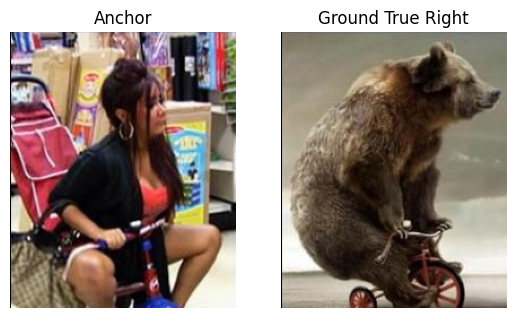

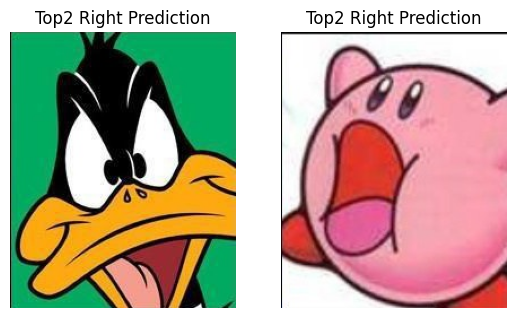

--------------------------------------------------------------


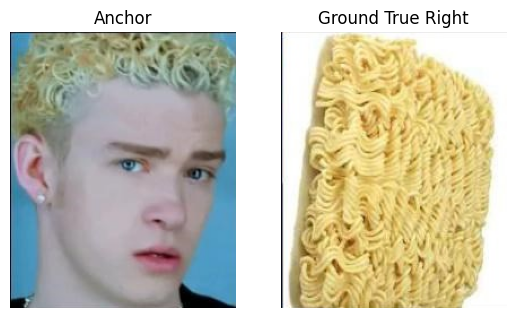

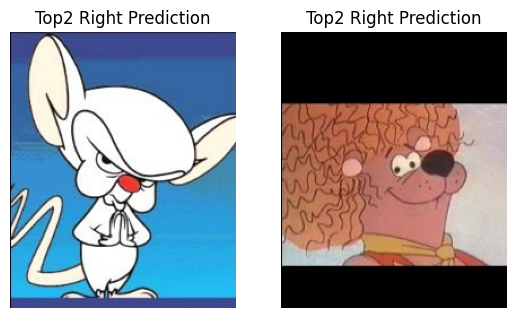

--------------------------------------------------------------


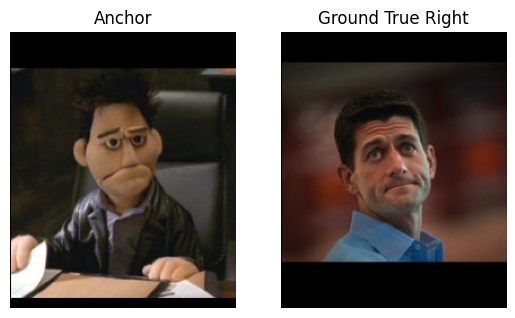

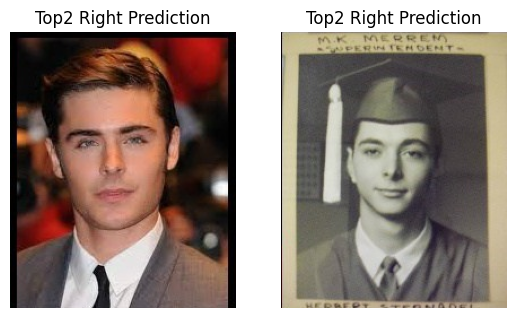

--------------------------------------------------------------


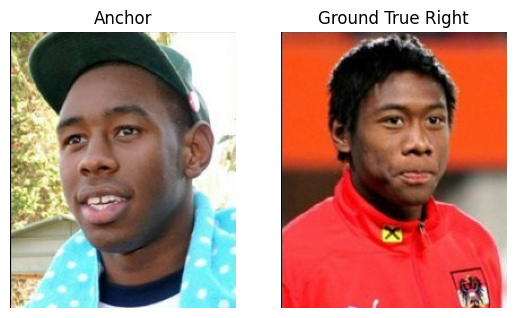

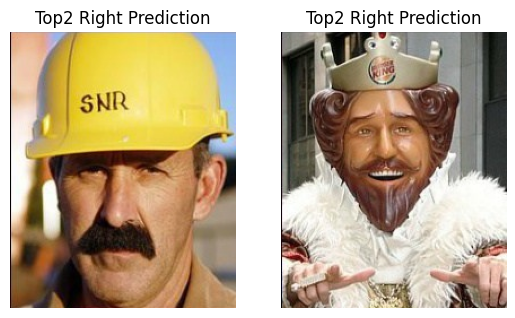

--------------------------------------------------------------


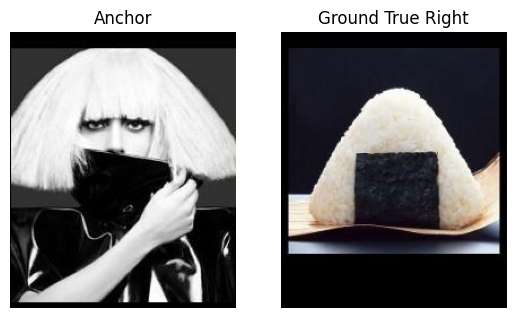

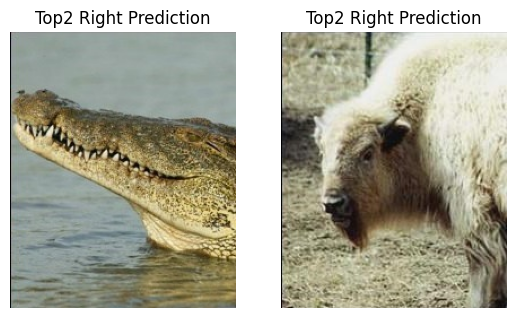

--------------------------------------------------------------


In [72]:

for i in index:
    ax = plt.subplot(1, 2, 1)
    img1 = cv2.imread(f'./COMP90086_2023_TLLdataset 2/train/left/{result.iloc[i, 0]}.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    ax.set_title('Anchor')
    plt.axis('off')
    plt.imshow(img1)

    ax = plt.subplot(1, 2, 2)
    img2 = cv2.imread(f'./COMP90086_2023_TLLdataset 2/train/right/{result.iloc[i, 2]}.jpg')
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    ax.set_title('Ground True Right')
    plt.imshow(img2)
    plt.axis('off')
    plt.show()
    
    ax = plt.subplot(1, 2, 1)
    img3 = cv2.imread(f'./COMP90086_2023_TLLdataset 2/train/right/{result.iloc[i, 1][0]}.jpg')
    img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    ax.set_title('Top2 Right Prediction')
    plt.axis('off')
    plt.imshow(img3)

    ax = plt.subplot(1, 2, 2)
    img4 = cv2.imread(f'./COMP90086_2023_TLLdataset 2/train/right/{result.iloc[i, 1][1]}.jpg')
    img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    plt.imshow(img4)
    ax.set_title('Top2 Right Prediction')
    plt.axis('off')
    plt.show()
    
    print("--------------------------------------------------------------")

    if i == 5:
        break